# Preprocessing of Shanghai traffic station pollutant dataset

This process mainly did the following things:
* Transfer the data into tensor of size [4 * 8 * 15791]. **4** stands for 4 stations. **8** stands for 8 kinds of pollutants. And **15791** stands for 15791 hours from 2018-01-01 00:00:00 to 2019-10-20 22:00:00.
* Save the tensor in a .mat file.
* Calculating the data missing rate of the dataset.
* Data imputation.

In [1]:
import numpy as np
from numpy.linalg import inv as inv
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

### Read .xls dataset

In [2]:
df = pd.read_excel('../Shanghai-traffic-station-pollutant-data-set/shanghai-pollutant.xls')
print(df.head(5))

  station            startime    NO   NO2    Nox   CO   PM25  PM10  SO2  O3
0   pddfl 2018-01-01 00:00:00  10.0  82.0   97.0  1.7  263.0   NaN  NaN NaN
1   pddfl 2018-01-01 01:00:00  13.0  85.0  105.0  1.7  252.0   NaN  NaN NaN
2   pddfl 2018-01-01 02:00:00   6.0  79.0   89.0  1.5  222.0   NaN  NaN NaN
3   pddfl 2018-01-01 03:00:00   9.0  79.0   94.0  1.4  185.0   NaN  NaN NaN
4   pddfl 2018-01-01 04:00:00   3.0  80.0   84.0  1.2  158.0   NaN  NaN NaN


### Fill blanks with 0

In [3]:
df = df.fillna(0)
print(df.head(5))

  station            startime    NO   NO2    Nox   CO   PM25  PM10  SO2   O3
0   pddfl 2018-01-01 00:00:00  10.0  82.0   97.0  1.7  263.0   0.0  0.0  0.0
1   pddfl 2018-01-01 01:00:00  13.0  85.0  105.0  1.7  252.0   0.0  0.0  0.0
2   pddfl 2018-01-01 02:00:00   6.0  79.0   89.0  1.5  222.0   0.0  0.0  0.0
3   pddfl 2018-01-01 03:00:00   9.0  79.0   94.0  1.4  185.0   0.0  0.0  0.0
4   pddfl 2018-01-01 04:00:00   3.0  80.0   84.0  1.2  158.0   0.0  0.0  0.0


### Set index of the dataframe to be 'station' and 'startime'

In [4]:
df.set_index(['station', 'startime'], inplace = True)
df

NO    NO2    Nox   CO   PM25   PM10   SO2  \
station startime                                                            
pddfl   2018-01-01 00:00:00   10.0   82.0   97.0  1.7  263.0    0.0   0.0   
        2018-01-01 01:00:00   13.0   85.0  105.0  1.7  252.0    0.0   0.0   
        2018-01-01 02:00:00    6.0   79.0   89.0  1.5  222.0    0.0   0.0   
        2018-01-01 03:00:00    9.0   79.0   94.0  1.4  185.0    0.0   0.0   
        2018-01-01 04:00:00    3.0   80.0   84.0  1.2  158.0    0.0   0.0   
        2018-01-01 05:00:00   19.0   72.0  101.0  1.3  149.0    0.0   0.0   
        2018-01-01 06:00:00   63.0   75.0  171.0  1.2  139.0    0.0   0.0   
        2018-01-01 07:00:00  157.0  105.0  347.0  1.3  130.0    0.0   0.0   
        2018-01-01 08:00:00    8.0   48.0   60.0  1.1  114.0    0.0   0.0   
        2018-01-01 09:00:00   15.0   47.0   70.0  1.0   97.0    0.0   0.0   
        2018-01-01 10:00:00   46.0   77.0  147.0  1.0   91.0    0.0   0.0   
        2018-01-01 11:00:00   33.0   59.0  110.0  0.8   73.0    0.0   0.0   
        2018-01-01 12:00:00   22.0   54.0   87.0  0.7   59.0    0.0   0.0   
        2018-01-01 13:00:00   22.0   48.0   82.0  0.6   53.0    0.0   0.0   
        2018-01-01 14:00:00   16.0   48.0   72.0  0.6   45.0    0.0   0.0   
        2018-01-01 15:00:00   20.0   58.0   88.0  0.6   43.0    0.0   0.0   
        2018-01-01 16:00:00   12.0   53.0   71.0  0.6   32.0    0.0   0.0   
        2018-01-01 17:00:00   29.0   71.0  117.0  0.6   28.0    0.0   0.0   
        2018-01-01 18:00:00   35.0   81.0  134.0  0.7   32.0    0.0   0.0   
        2018-01-01 19:00:00   93.0   95.0  237.0  0.9   30.0    0.0   0.0   
        2018-01-01 20:00:00   53.0   89.0  171.0  0.8   37.0    0.0   0.0   
        2018-01-01 21:00:00   72.0   95.0  205.0  0.8   34.0    0.0   0.0   
        2018-01-01 22:00:00   35.0   90.0  144.0  0.8   35.0    0.0   0.0   
        2018-01-01 23:00:00   15.0   73.0   95.0  0.7   39.0    0.0   0.0   
        2018-01-02 00:00:00    6.0   50.0   59.0  0.7   35.0    0.0   0.0   
        2018-01-02 01:00:00    3.0   36.0   41.0  0.6   34.0    0.0   0.0   
        2018-01-02 02:00:00    2.0   33.0   37.0  0.5   37.0    0.0   0.0   
        2018-01-02 03:00:00    2.0   31.0   35.0  0.5   35.0    0.0   0.0   
        2018-01-02 04:00:00    3.0   31.0   36.0  0.5   30.0    0.0   0.0   
        2018-01-02 05:00:00   10.0   40.0   55.0  0.5   27.0    0.0   0.0   
...                            ...    ...    ...  ...    ...    ...   ...   
xhcxl   2019-10-19 17:00:00   41.0  104.0  165.0  0.8   27.0   80.0   8.0   
        2019-10-19 18:00:00   56.0   97.0  182.0  0.8   28.0   73.0   8.0   
        2019-10-19 19:00:00   46.0  100.0  170.0  0.7   40.0   75.0   8.0   
        2019-10-19 20:00:00   54.0   99.0  178.0  0.7   34.0   68.0   8.0   
        2019-10-19 21:00:00   48.0  105.0  179.0  0.9   39.0   68.0   8.0   
        2019-10-19 22:00:00   65.0  115.0  215.0  1.0   42.0   73.0   9.0   
        2019-10-19 23:00:00   44.0  104.0  173.0  0.9   43.0   73.0   8.0   
        2019-10-20 00:00:00   43.0  103.0  168.0  1.1   41.0   83.0   8.0   
        2019-10-20 01:00:00   36.0   86.0  142.0  1.2   46.0   85.0   7.0   
        2019-10-20 02:00:00   51.0   87.0  164.0  1.3   47.0   85.0   8.0   
        2019-10-20 03:00:00   43.0   87.0  153.0  1.1   54.0   78.0   8.0   
        2019-10-20 04:00:00   79.0   94.0  215.0  1.2   57.0   88.0   8.0   
        2019-10-20 05:00:00  139.0  103.0  316.0  1.2   60.0  111.0   8.0   
        2019-10-20 06:00:00  181.0   98.0  372.0  1.1   65.0  137.0   9.0   
        2019-10-20 07:00:00  199.0  118.0  382.0  1.2   67.0  128.0  10.0   
        2019-10-20 08:00:00   43.0  102.0  167.0  0.8   53.0   71.0   8.0   
        2019-10-20 09:00:00   35.0   80.0  130.0  0.7   38.0   55.0   8.0   
        2019-10-20 10:00:00   22.0   71.0  104.0  0.7   38.0   54.0   8.0   
        2019-10-20 11:00:00   23.0   72.0  107.0  0.7   36.0   58.0   8.0   
        2019-10-20 12:00:00 

### Transform datas to numpy matrices

In [5]:
xhcxl_loc = df.loc['xhcxl']
jaghxl_loc = df.loc['jaghxl']
jayaxl_loc = df.loc['jayaxl']
pddfl_loc = df.loc['pddfl']

xhcxl_data = xhcxl_loc.to_numpy().T
jaghxl_data = jaghxl_loc.to_numpy().T
jayaxl_data = jayaxl_loc.to_numpy().T
pddfl_data = pddfl_loc.to_numpy().T

print('Shape of xhcxl_data:')
print(xhcxl_data.shape)
print('Shape of jaghxl_data:')
print(jaghxl_data.shape)
print('Shape of xhcxl_data:')
print(jayaxl_data.shape)
print('Shape of xhcxl_data:')
print(pddfl_data.shape)
print()

print('First 3 entries from xhcxl station:')
print(xhcxl_data[:,:3])
print()
print('First 3 entries from jaghxl station:')
print(jaghxl_data[:,:3])
print()
print('First 3 entries from jayaxl station:')
print(jayaxl_data[:,:3])
print()
print('First 3 entries from pddfl station:')
print(pddfl_data[:,:3])

Shape of xhcxl_data:
(8, 15791)
Shape of jaghxl_data:
(8, 15791)
Shape of xhcxl_data:
(8, 15791)
Shape of xhcxl_data:
(8, 15791)

First 3 entries from xhcxl station:
[[ 58.   40.   52. ]
 [ 88.   88.   88. ]
 [179.  150.  168. ]
 [  1.6   1.9   1.9]
 [252.  257.  250. ]
 [249.  242.  219. ]
 [  9.    9.   10. ]
 [  4.    3.    3. ]]

First 3 entries from jaghxl station:
[[ 49.   54.   39. ]
 [ 88.   77.   75. ]
 [164.  160.  134. ]
 [  1.4   1.7   1.7]
 [245.  240.  216. ]
 [249.  218.  196. ]
 [ 16.   17.   12. ]
 [  6.   16.   11. ]]

First 3 entries from jayaxl station:
[[ 87.   54.   59. ]
 [ 98.   94.   96. ]
 [231.  177.  186. ]
 [  1.5   2.2   2. ]
 [260.  268.  244. ]
 [248.  231.  194. ]
 [  0.    0.    0. ]
 [  0.    0.    0. ]]

First 3 entries from pddfl station:
[[ 10.   13.    6. ]
 [ 82.   85.   79. ]
 [ 97.  105.   89. ]
 [  1.7   1.7   1.5]
 [263.  252.  222. ]
 [  0.    0.    0. ]
 [  0.    0.    0. ]
 [  0.    0.    0. ]]


### Merge those matrices to a tensor

In [6]:
data_tensor = np.array([xhcxl_data, jaghxl_data, jayaxl_data, pddfl_data])
print('Shape of data_tensor:')
print(data_tensor.shape)

Shape of data_tensor:
(4, 8, 15791)


### Save tensor in .mat file

In [7]:
scipy.io.savemat('../Shanghai-traffic-station-pollutant-data-set/data_tensor.mat',
                 {"tensor": data_tensor})

### Read .mat file example

In [8]:
tensor = scipy.io.loadmat('../Shanghai-traffic-station-pollutant-data-set/data_tensor.mat')

In [9]:
tensor = tensor['tensor']

In [10]:
print(tensor.shape)

(4, 8, 15791)


### Calculating missing rate at Xuhui Caoxilu Station

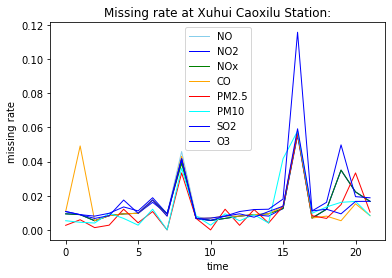

In [11]:
xhcxl_mr_NO = []
xhcxl_mr_NO_2 = []
xhcxl_mr_NO_x = []
xhcxl_mr_CO = []
xhcxl_mr_PM_25 = []
xhcxl_mr_PM_10 = []
xhcxl_mr_SO_2 = []
xhcxl_mr_O_3 = []

mr = {'NO':xhcxl_mr_NO, 'NO2':xhcxl_mr_NO_2, 'Nox':xhcxl_mr_NO_x, 'CO':xhcxl_mr_CO,
     'PM25':xhcxl_mr_PM_25, 'PM10':xhcxl_mr_PM_10, 'SO2':xhcxl_mr_SO_2, 'O3':xhcxl_mr_O_3}

pollutant = ['NO', 'NO2', 'Nox', 'CO', 'PM25', 'PM10', 'SO2', 'O3']
df2 = df.loc['xhcxl']
for year in [2018, 2019]:
    for month in range(1,13):
        for item in pollutant:
            series = df2[(df2.index.year == year)&(df2.index.month == month)][item]
            if len(series) != 0:
                mr[item].append(len(series[series == 0])/len(series))
plt.title('Missing rate at Xuhui Caoxilu Station:')
plt.ylabel('missing rate')
plt.xlabel('time')
plt.plot(xhcxl_mr_NO, label = 'NO', marker='', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=1)
plt.plot(xhcxl_mr_NO_2, label = 'NO2', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=1)
plt.plot(xhcxl_mr_NO_x, label = 'NOx', marker='', markerfacecolor='blue', markersize=8, color='green', linewidth=1)
plt.plot(xhcxl_mr_CO, label = 'CO', marker='', markerfacecolor='blue', markersize=8, color='orange', linewidth=1)
plt.plot(xhcxl_mr_PM_25, label = 'PM2.5', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=1)
plt.plot(xhcxl_mr_PM_10, label = 'PM10', marker='', markerfacecolor='blue', markersize=8, color='cyan', linewidth=1)
plt.plot(xhcxl_mr_SO_2, label = 'SO2', marker='', markerfacecolor='blue', markersize=8, color='black', linewidth=1)
plt.plot(xhcxl_mr_O_3, label = 'O3', marker='', markerfacecolor='blue', markersize=8, color='gray', linewidth=1)

plt.legend()

### Calculate missing rate at Jinan Gonghexinlu Station

No SO2 and O3 data in Jinan Gonghexinlu Station!


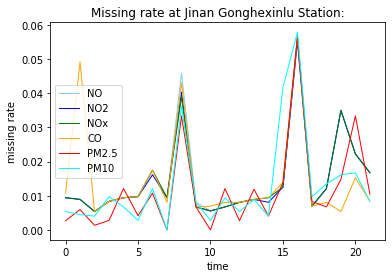

In [12]:
jaghxl_mr_NO = []
jaghxl_mr_NO_2 = []
jaghxl_mr_NO_x = []
jaghxl_mr_CO = []
jaghxl_mr_PM_25 = []
jaghxl_mr_PM_10 = []
jaghxl_mr_SO_2 = []
jaghxl_mr_O_3 = []

mr = {'NO':jaghxl_mr_NO, 'NO2':jaghxl_mr_NO_2, 'Nox':jaghxl_mr_NO_x, 'CO':jaghxl_mr_CO,
     'PM25':jaghxl_mr_PM_25, 'PM10':jaghxl_mr_PM_10, 'SO2':jaghxl_mr_SO_2, 'O3':jaghxl_mr_O_3}

pollutant = ['NO', 'NO2', 'Nox', 'CO', 'PM25', 'PM10', 'SO2', 'O3']
df3 = df.loc['jaghxl']
for year in [2018, 2019]:
    for month in range(1,13):
        for item in pollutant:
            series = df2[(df2.index.year == year)&(df2.index.month == month)][item]
            if len(series) != 0:
                mr[item].append(len(series[series == 0])/len(series))
plt.title('Missing rate at Jinan Gonghexinlu Station:')
plt.ylabel('missing rate')
plt.xlabel('time')
plt.plot(jaghxl_mr_NO, label = 'NO', marker='', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=1)
plt.plot(jaghxl_mr_NO_2, label = 'NO2', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=1)
plt.plot(jaghxl_mr_NO_x, label = 'NOx', marker='', markerfacecolor='blue', markersize=8, color='green', linewidth=1)
plt.plot(jaghxl_mr_CO, label = 'CO', marker='', markerfacecolor='blue', markersize=8, color='orange', linewidth=1)
plt.plot(jaghxl_mr_PM_25, label = 'PM2.5', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=1)
plt.plot(jaghxl_mr_PM_10, label = 'PM10', marker='', markerfacecolor='blue', markersize=8, color='cyan', linewidth=1)
# plt.plot(jaghxl_mr_SO_2, label = 'SO2', marker='', markerfacecolor='blue', markersize=8, color='black', linewidth=1)
# plt.plot(jaghxl_mr_O_3, label = 'O3', marker='', markerfacecolor='blue', markersize=8, color='gray', linewidth=1)

plt.legend()
print('No SO2 and O3 data in Jinan Gonghexinlu Station!')

### Calculate missing rate at Jinan Yananxilu Station

No SO2 and O3 data in Jinan Yananxilu Station


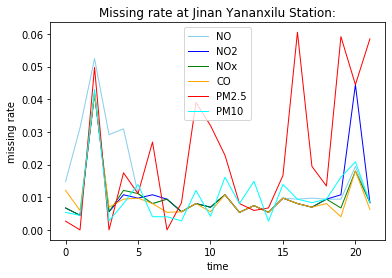

In [13]:
jayaxl_mr_NO = []
jayaxl_mr_NO_2 = []
jayaxl_mr_NO_x = []
jayaxl_mr_CO = []
jayaxl_mr_PM_25 = []
jayaxl_mr_PM_10 = []
jayaxl_mr_SO_2 = []
jayaxl_mr_O_3 = []

mr = {'NO':jayaxl_mr_NO, 'NO2':jayaxl_mr_NO_2, 'Nox':jayaxl_mr_NO_x, 'CO':jayaxl_mr_CO,
     'PM25':jayaxl_mr_PM_25, 'PM10':jayaxl_mr_PM_10, 'SO2':jayaxl_mr_SO_2, 'O3':jayaxl_mr_O_3}

pollutant = ['NO', 'NO2', 'Nox', 'CO', 'PM25', 'PM10', 'SO2', 'O3']
df2 = df.loc['jayaxl']
for year in [2018, 2019]:
    for month in range(1,13):
        for item in pollutant:
            series = df2[(df2.index.year == year)&(df2.index.month == month)][item]
            if len(series) != 0:
                mr[item].append(len(series[series == 0])/len(series))
plt.title('Missing rate at Jinan Yananxilu Station:')
plt.ylabel('missing rate')
plt.xlabel('time')
plt.plot(jayaxl_mr_NO, label = 'NO', marker='', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=1)
plt.plot(jayaxl_mr_NO_2, label = 'NO2', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=1)
plt.plot(jayaxl_mr_NO_x, label = 'NOx', marker='', markerfacecolor='blue', markersize=8, color='green', linewidth=1)
plt.plot(jayaxl_mr_CO, label = 'CO', marker='', markerfacecolor='blue', markersize=8, color='orange', linewidth=1)
plt.plot(jayaxl_mr_PM_25, label = 'PM2.5', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=1)
plt.plot(jayaxl_mr_PM_10, label = 'PM10', marker='', markerfacecolor='blue', markersize=8, color='cyan', linewidth=1)
# plt.plot(jayaxl_mr_SO_2, label = 'SO2', marker='', markerfacecolor='blue', markersize=8, color='black', linewidth=1)
# plt.plot(jayaxl_mr_O_3, label = 'O3', marker='', markerfacecolor='blue', markersize=8, color='gray', linewidth=1)
plt.legend()
print('No SO2 and O3 data in Jinan Yananxilu Station')

### Calculate missing rate at Pudong Dongfanglu Station

No PM10, SO2 and O3 data in Pudong Dongfanglu Station!


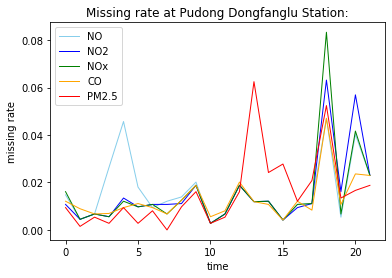

In [14]:
pddfl_mr_NO = []
pddfl_mr_NO_2 = []
pddfl_mr_NO_x = []
pddfl_mr_CO = []
pddfl_mr_PM_25 = []
pddfl_mr_PM_10 = []
pddfl_mr_SO_2 = []
pddfl_mr_O_3 = []

mr = {'NO':pddfl_mr_NO, 'NO2':pddfl_mr_NO_2, 'Nox':pddfl_mr_NO_x, 'CO':pddfl_mr_CO,
     'PM25':pddfl_mr_PM_25, 'PM10':pddfl_mr_PM_10, 'SO2':pddfl_mr_SO_2, 'O3':pddfl_mr_O_3}

pollutant = ['NO', 'NO2', 'Nox', 'CO', 'PM25', 'PM10', 'SO2', 'O3']
df2 = df.loc['pddfl']
for year in [2018, 2019]:
    for month in range(1,13):
        for item in pollutant:
            series = df2[(df2.index.year == year)&(df2.index.month == month)][item]
            if len(series) != 0:
                mr[item].append(len(series[series == 0])/len(series))
plt.title('Missing rate at Pudong Dongfanglu Station:')
plt.ylabel('missing rate')
plt.xlabel('time')
plt.plot(pddfl_mr_NO, label = 'NO', marker='', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=1)
plt.plot(pddfl_mr_NO_2, label = 'NO2', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=1)
plt.plot(pddfl_mr_NO_x, label = 'NOx', marker='', markerfacecolor='blue', markersize=8, color='green', linewidth=1)
plt.plot(pddfl_mr_CO, label = 'CO', marker='', markerfacecolor='blue', markersize=8, color='orange', linewidth=1)
plt.plot(pddfl_mr_PM_25, label = 'PM2.5', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=1)
# plt.plot(pddfl_mr_PM_10, label = 'PM10', marker='', markerfacecolor='blue', markersize=8, color='cyan', linewidth=1)
# plt.plot(pddfl_mr_SO_2, label = 'SO2', marker='', markerfacecolor='blue', markersize=8, color='black', linewidth=1)
# plt.plot(pddfl_mr_O_3, label = 'O3', marker='', markerfacecolor='blue', markersize=8, color='gray', linewidth=1)
plt.legend()

print('No PM10, SO2 and O3 data in Pudong Dongfanglu Station!')

# Data imputation using Temporal Regularized Matrix Factorization
>**Reference**: Hsiang-Fu Yu, Nikhil Rao, Inderjit S. Dhillon, 2016. [*Temporal regularized matrix factorization for high-dimensional time series prediction*](http://www.cs.utexas.edu/~rofuyu/papers/tr-mf-nips.pdf). 30th Conference on Neural Information Processing Systems (*NIPS 2016*), Barcelona, Spain.

# Data Organization: Matrix Structure

We consider a dataset of $m$ discrete time series $\boldsymbol{y}_{i}\in\mathbb{R}^{f},i\in\left\{1,2,...,m\right\}$. The time series may have missing elements. We express spatio-temporal dataset as a matrix $Y\in\mathbb{R}^{m\times f}$ with $m$ rows (e.g., locations) and $f$ columns (e.g., discrete time intervals),

$$Y=\left[ \begin{array}{cccc} y_{11} & y_{12} & \cdots & y_{1f} \\ y_{21} & y_{22} & \cdots & y_{2f} \\ \vdots & \vdots & \ddots & \vdots \\ y_{m1} & y_{m2} & \cdots & y_{mf} \\ \end{array} \right]\in\mathbb{R}^{m\times f}.$$

# Temporal Regularized Matrix Factorization(TRMF)
Temporal Regularized Matrix Factorization (TRMF) framework is an approach to incorporate temporal dependencies into matrix factorization models which use well-studied time series models to describe temporal dependencies
among ${\boldsymbol{x}_t}$ explicitly.Such models take the form:

$$\boldsymbol{x}_{t}\approx\sum_{l\in\mathcal{L}}\boldsymbol{\theta}_{l}\circledast\boldsymbol{x}_{t-l}$$

where this autoregressive (AR) is specialized by a lag set $\mathcal{L}=\left\{l_1,l_2,...,l_d\right\}$ (e.g., $\mathcal{L}=\left\{1,2,144\right\}$) and weights $\boldsymbol{\theta}_{l}\in\mathbb{R}^{r},\forall l$, and we further define

$$\mathcal{R}_{AR}\left(X\mid \mathcal{L},\Theta,\eta\right)=\frac{1}{2}\sum_{t=l_d+1}^{f}\left(\boldsymbol{x}_{t}-\sum_{l\in\mathcal{L}}\boldsymbol{\theta}_{l}\circledast\boldsymbol{x}_{t-l}\right)^\top\left(\boldsymbol{x}_{t}-\sum_{l\in\mathcal{L}}\boldsymbol{\theta}_{l}\circledast\boldsymbol{x}_{t-l}\right)+\frac{\eta}{2}\sum_{t=1}^{f}\boldsymbol{x}_{t}^\top\boldsymbol{x}_{t}.$$

Thus, TRMF-AR is given by solving

$$\min_{W,X,\Theta}\frac{1}{2}\underbrace{\sum_{(i,t)\in\Omega}\left(y_{it}-\boldsymbol{w}_{i}^T\boldsymbol{x}_{t}\right)^2}_{\text{sum of squared residual errors}}+\lambda_{w}\underbrace{\mathcal{R}_{w}\left(W\right)}_{W-\text{regularizer}}+\lambda_{x}\underbrace{\mathcal{R}_{AR}\left(X\mid \mathcal{L},\Theta,\eta\right)}_{\text{AR-regularizer}}+\lambda_{\theta}\underbrace{\mathcal{R}_{\theta}\left(\Theta\right)}_{\Theta-\text{regularizer}}$$

where $\mathcal{R}_{w}\left(W\right)=\frac{1}{2}\sum_{i=1}^{m}\boldsymbol{w}_{i}^\top\boldsymbol{w}_{i}$ and $\mathcal{R}_{\theta}\left(\Theta\right)=\frac{1}{2}\sum_{l\in\mathcal{L}}\boldsymbol{\theta}_{l}^\top\boldsymbol{\theta}_{l}$ are regularization terms.

## Matrix Computation Concepts

### Kronecker product

- **Definition**:

Given two matrices $A\in\mathbb{R}^{m_1\times n_1}$ and $B\in\mathbb{R}^{m_2\times n_2}$, then, the **Kronecker product** between these two matrices is defined as

$$A\otimes B=\left[ \begin{array}{cccc} a_{11}B & a_{12}B & \cdots & a_{1m_2}B \\ a_{21}B & a_{22}B & \cdots & a_{2m_2}B \\ \vdots & \vdots & \ddots & \vdots \\ a_{m_11}B & a_{m_12}B & \cdots & a_{m_1m_2}B \\ \end{array} \right]$$
where the symbol $\otimes$ denotes Kronecker product, and the size of resulted $A\otimes B$ is $(m_1m_2)\times (n_1n_2)$ (i.e., $m_1\times m_2$ columns and $n_1\times n_2$ rows).

- **Example**:

If $A=\left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \\ \end{array} \right]$ and $B=\left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10 \\ \end{array} \right]$, then, we have

$$A\otimes B=\left[ \begin{array}{cc} 1\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] & 2\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] \\ 3\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] & 4\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] \\ \end{array} \right]$$

$$=\left[ \begin{array}{cccccc} 5 & 6 & 7 & 10 & 12 & 14 \\ 8 & 9 & 10 & 16 & 18 & 20 \\ 15 & 18 & 21 & 20 & 24 & 28 \\ 24 & 27 & 30 & 32 & 36 & 40 \\ \end{array} \right]\in\mathbb{R}^{4\times 6}.$$

### Khatri-Rao product (`kr_prod`)

- **Definition**:

Given two matrices $A=\left( \boldsymbol{a}_1,\boldsymbol{a}_2,...,\boldsymbol{a}_r \right)\in\mathbb{R}^{m\times r}$ and $B=\left( \boldsymbol{b}_1,\boldsymbol{b}_2,...,\boldsymbol{b}_r \right)\in\mathbb{R}^{n\times r}$ with same number of columns, then, the **Khatri-Rao product** (or **column-wise Kronecker product**) between $A$ and $B$ is given as follows,

$$A\odot B=\left( \boldsymbol{a}_1\otimes \boldsymbol{b}_1,\boldsymbol{a}_2\otimes \boldsymbol{b}_2,...,\boldsymbol{a}_r\otimes \boldsymbol{b}_r \right)\in\mathbb{R}^{(mn)\times r}$$
where the symbol $\odot$ denotes Khatri-Rao product, and $\otimes$ denotes Kronecker product.

- **Example**:

If $A=\left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \\ \end{array} \right]=\left( \boldsymbol{a}_1,\boldsymbol{a}_2 \right) $ and $B=\left[ \begin{array}{cc} 5 & 6 \\ 7 & 8 \\ 9 & 10 \\ \end{array} \right]=\left( \boldsymbol{b}_1,\boldsymbol{b}_2 \right) $, then, we have

$$A\odot B=\left( \boldsymbol{a}_1\otimes \boldsymbol{b}_1,\boldsymbol{a}_2\otimes \boldsymbol{b}_2 \right) $$

$$=\left[ \begin{array}{cc} \left[ \begin{array}{c} 1 \\ 3 \\ \end{array} \right]\otimes \left[ \begin{array}{c} 5 \\ 7 \\ 9 \\ \end{array} \right] & \left[ \begin{array}{c} 2 \\ 4 \\ \end{array} \right]\otimes \left[ \begin{array}{c} 6 \\ 8 \\ 10 \\ \end{array} \right] \\ \end{array} \right]$$

$$=\left[ \begin{array}{cc} 5 & 12 \\ 7 & 16 \\ 9 & 20 \\ 15 & 24 \\ 21 & 32 \\ 27 & 40 \\ \end{array} \right]\in\mathbb{R}^{6\times 2}.$$

In [15]:
def kr_prod(a, b):
    return np.einsum('ir, jr -> ijr', a, b).reshape(a.shape[0] * b.shape[0], -1)

In [16]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8], [9, 10]])
print(kr_prod(A, B))

[[ 5 12]
 [ 7 16]
 [ 9 20]
 [15 24]
 [21 32]
 [27 40]]


In [17]:
def TRMF(dense_mat, sparse_mat, W, X, theta, time_lags, lambda_w, lambda_x, lambda_theta, eta, maxiter):
    dim1, dim2 = sparse_mat.shape
    binary_mat = np.zeros((dim1, dim2))
    position = np.where((sparse_mat != 0))
    binary_mat[position] = 1
    pos = np.where((dense_mat != 0) & (sparse_mat == 0))
    d, r = theta.shape

    for iters in range(maxiter):
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = np.matmul(var2, binary_mat.T).reshape([r, r, dim1]) + np.dstack([lambda_w * np.eye(r)] * dim1)
        var4 = np.matmul(var1, sparse_mat.T)
        for i in range(dim1):
            W[i, :] = np.matmul(inv(var3[:, :, i]), var4[:, i])

        var1 = W.T
        var2 = kr_prod(var1, var1)
        var3 = np.matmul(var2, binary_mat).reshape([r, r, dim2]) + np.dstack([lambda_x * eta * np.eye(r)] * dim2)
        var4 = np.matmul(var1, sparse_mat)
        for t in range(dim2):
            Mt = np.zeros((r, r))
            Nt = np.zeros(r)
            if t < np.max(time_lags):
                Pt = np.zeros((r, r))
                Qt = np.zeros(r)
            else:
                Pt = np.eye(r)
                Qt = np.einsum('ij, ij -> j', theta, X[t - time_lags, :])
            if t < dim2 - np.min(time_lags):
                if t >= np.max(time_lags) and t < dim2 - np.max(time_lags):
                    index = list(range(0, d))
                else:
                    index = list(np.where((t + time_lags >= np.max(time_lags)) & (t + time_lags < dim2)))[0]
                for k in index:
                    Ak = theta[k, :]
                    Mt += np.diag(Ak ** 2)
                    theta0 = theta.copy()
                    theta0[k, :] = 0
                    var5 = (X[t + time_lags[k], :] 
                            - np.einsum('ij, ij -> j', theta0, X[t + time_lags[k] - time_lags, :]))
                    Nt += np.multiply(Ak, var5)
            var_mu = var4[:, t] + lambda_x * Nt + lambda_x * Qt
            var_Lambda = var3[:, :, t] + lambda_x * Mt + lambda_x * Pt
            X[t, :] = np.matmul(inv(var_Lambda), var_mu)
        
        for k in range(d):
            theta0 = theta.copy()
            theta0[k, :] = 0
            mat0 = np.zeros((dim2 - np.max(time_lags), rank))
            for L in range(d):
                mat0 += np.matmul(X[np.max(time_lags) - time_lags[L] : dim2 - time_lags[L] , :], 
                                  np.diag(theta0[L, :]))
            VarPi = X[np.max(time_lags) : dim2, :] - mat0
            var1 = np.zeros((rank, rank))
            var2 = np.zeros(rank)
            for t in range(np.max(time_lags), dim2):
                B = X[t - time_lags[k], :]
                var1 += np.diag(np.multiply(B, B))
                var2 += np.matmul(np.diag(B), VarPi[t - np.max(time_lags), :])
            theta[k, :] = np.matmul(inv(var1 + lambda_theta * np.eye(r)/lambda_x), var2)

        mat_hat = np.matmul(W, X.T)
        mape = np.sum(np.abs(dense_mat[pos] - mat_hat[pos])/dense_mat[pos])/dense_mat[pos].shape[0]
        rmse = np.sqrt(np.sum((dense_mat[pos] - mat_hat[pos]) ** 2)/dense_mat[pos].shape[0])
        
        if (iters + 1) % 200 == 0:
            print('Iter: {}'.format(iters + 1))
            print('Imputation MAPE: {:.6}'.format(mape))
            print('Imputation RMSE: {:.6}'.format(rmse))
            print()
    return mat_hat, W, X

### Matrix concatenate

In [18]:
mat1 = np.random.rand(3,3)
mat2 = np.random.rand(3,3)
Mat = np.concatenate((mat1, mat2), axis = 0)
print('matrix 1:')
print(mat1)
print('\nmatrix 2:')
print(mat2)
print('\nConcatenate along axsi 0:')
print(Mat)

matrix 1:
[[0.56651646 0.71273902 0.49632011]
 [0.58514461 0.13195724 0.97655432]
 [0.5702094  0.51975859 0.70121724]]

matrix 2:
[[0.94453366 0.69352726 0.23759832]
 [0.84992376 0.50825751 0.61889411]
 [0.73514156 0.76392043 0.58487124]]

Concatenate along axsi 0:
[[0.56651646 0.71273902 0.49632011]
 [0.58514461 0.13195724 0.97655432]
 [0.5702094  0.51975859 0.70121724]
 [0.94453366 0.69352726 0.23759832]
 [0.84992376 0.50825751 0.61889411]
 [0.73514156 0.76392043 0.58487124]]


### Transform data tensor into a matrix

The [4 * 8 * 15791] sized tensor was sliced and concatenated to matrix of size [25 * 15791]. The reason why the first dimension of the matrix is not $4\times8 = 32$ is that there are no observations of certain polltant in some stations. The missing situation are as follows:

* PM10, SO2 and O3 are missing at Pudong Dongfanglu Station.
* SO2 and O3 are missing at Jinan Yananxilu Station.
* SO2 and O3 are missing at Jinan Gonghexinlu Station.

So we have $4\times8-7 =25$ valid observations.

In [19]:
import scipy.io

tensor = scipy.io.loadmat('../Shanghai-traffic-station-pollutant-data-set/data_tensor.mat')
tensor = tensor['tensor']
dense_mat = np.concatenate((tensor[0, :, :], tensor[1, :6, :],
                            tensor[2, :6, :], tensor[3, :5, :]), axis = 0)
print(dense_mat.shape)

(25, 15791)


### Create sparse matrix
To verify whether **TRMF** is suitable to this dataset, we randomly choosed 10% entries in the initial matrix, making them zero. Then we used **TRMF** to recover those datas and compared them to the real ones. **MSE**(Mean Square Error) and **MAPE**(Mean Average Percentage Error) were calculated to indicate the imputation effect.

In [20]:
missing_rate = 0.1
uniform_rm_matrix = np.random.uniform(size = (25,15791))
binary_matrix = np.round(uniform_rm_matrix + 0.5 - missing_rate)
sparse_mat = np.multiply(dense_mat, binary_matrix)

## Matrix imputation verification

In [28]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 50
lambda_w = 500
lambda_x = 500
lambda_theta = 500
eta = 0.03
time_lags = np.array([1, 2, 24])
d = time_lags.shape[0]
W = 0.1 * np.random.rand(dim1, rank)
X = 0.1 * np.random.rand(dim2, rank)
theta = 0.1 * np.random.rand(d, rank)
maxiter = 1000
rec_mat, _, _ = TRMF(dense_mat, sparse_mat, W, X, theta, time_lags, lambda_w, lambda_x, lambda_theta, eta, maxiter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
Imputation MAPE: 0.150807
Imputation RMSE: 7.14047

Iter: 400
Imputation MAPE: 0.152043
Imputation RMSE: 7.01983

Iter: 600
Imputation MAPE: 0.150851
Imputation RMSE: 6.91744

Iter: 800
Imputation MAPE: 0.150053
Imputation RMSE: 6.82706

Iter: 1000
Imputation MAPE: 0.149633
Imputation RMSE: 6.79401

Running time: 6810 seconds


**Experiment results** of missing data imputation using TRMF:

|  scenario |`rank`|`Lambda_w`|`Lambda_x`|`Lambda_theta`|`eta`|`maxiter`|      mape |      rmse |
|:----------|-----:|---------:|---------:|-------------:|----:|--------:|----------:|----------:|
|**10%, RM**|   20 |      500 |      500 |          500 | 0.03|    1000 | **0.14988**| **7.28682**|
|**10%, RM**|   25 |      500 |      500 |          500 | 0.03|    1000 | **0.151016**| **7.09034**|
|**10%, RM**|   30 |      500 |      500 |          500 | 0.03|    1000 | **0.15025**| **6.91726**|
|**10%, RM**|   40 |      500 |      500 |          500 | 0.03|    1000 | **0.149013**| **6.83023**|
|**10%, RM**|   50 |      500 |      500 |          500 | 0.03|    1000 | **0.149633**| **6.79401**|

As can be seen above, the data recovery mean percentage error is less than 15%, which is acceptable. We can use **TRMF** to recover our data.

## Matrix imputation

In [29]:
def TRMF(dense_mat, sparse_mat, W, X, theta, time_lags, lambda_w, lambda_x, lambda_theta, eta, maxiter):
    dim1, dim2 = sparse_mat.shape
    binary_mat = np.zeros((dim1, dim2))
    position = np.where((sparse_mat != 0))
    binary_mat[position] = 1
#     pos = np.where((dense_mat != 0) & (sparse_mat == 0))
    d, r = theta.shape

    for iters in range(maxiter):
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = np.matmul(var2, binary_mat.T).reshape([r, r, dim1]) + np.dstack([lambda_w * np.eye(r)] * dim1)
        var4 = np.matmul(var1, sparse_mat.T)
        for i in range(dim1):
            W[i, :] = np.matmul(inv(var3[:, :, i]), var4[:, i])

        var1 = W.T
        var2 = kr_prod(var1, var1)
        var3 = np.matmul(var2, binary_mat).reshape([r, r, dim2]) + np.dstack([lambda_x * eta * np.eye(r)] * dim2)
        var4 = np.matmul(var1, sparse_mat)
        for t in range(dim2):
            Mt = np.zeros((r, r))
            Nt = np.zeros(r)
            if t < np.max(time_lags):
                Pt = np.zeros((r, r))
                Qt = np.zeros(r)
            else:
                Pt = np.eye(r)
                Qt = np.einsum('ij, ij -> j', theta, X[t - time_lags, :])
            if t < dim2 - np.min(time_lags):
                if t >= np.max(time_lags) and t < dim2 - np.max(time_lags):
                    index = list(range(0, d))
                else:
                    index = list(np.where((t + time_lags >= np.max(time_lags)) & (t + time_lags < dim2)))[0]
                for k in index:
                    Ak = theta[k, :]
                    Mt += np.diag(Ak ** 2)
                    theta0 = theta.copy()
                    theta0[k, :] = 0
                    var5 = (X[t + time_lags[k], :] 
                            - np.einsum('ij, ij -> j', theta0, X[t + time_lags[k] - time_lags, :]))
                    Nt += np.multiply(Ak, var5)
            var_mu = var4[:, t] + lambda_x * Nt + lambda_x * Qt
            var_Lambda = var3[:, :, t] + lambda_x * Mt + lambda_x * Pt
            X[t, :] = np.matmul(inv(var_Lambda), var_mu)
        
        for k in range(d):
            theta0 = theta.copy()
            theta0[k, :] = 0
            mat0 = np.zeros((dim2 - np.max(time_lags), rank))
            for L in range(d):
                mat0 += np.matmul(X[np.max(time_lags) - time_lags[L] : dim2 - time_lags[L] , :], 
                                  np.diag(theta0[L, :]))
            VarPi = X[np.max(time_lags) : dim2, :] - mat0
            var1 = np.zeros((rank, rank))
            var2 = np.zeros(rank)
            for t in range(np.max(time_lags), dim2):
                B = X[t - time_lags[k], :]
                var1 += np.diag(np.multiply(B, B))
                var2 += np.matmul(np.diag(B), VarPi[t - np.max(time_lags), :])
            theta[k, :] = np.matmul(inv(var1 + lambda_theta * np.eye(r)/lambda_x), var2)

        mat_hat = np.matmul(W, X.T)
#         mape = np.sum(np.abs(dense_mat[pos] - mat_hat[pos])/dense_mat[pos])/dense_mat[pos].shape[0]
#         rmse = np.sqrt(np.sum((dense_mat[pos] - mat_hat[pos]) ** 2)/dense_mat[pos].shape[0])
        
        if (iters + 1) % 200 == 0:
            print('Iter: {}'.format(iters + 1))
#             print('Imputation MAPE: {:.6}'.format(mape))
#             print('Imputation RMSE: {:.6}'.format(rmse))
            print()
    return mat_hat, W, X

In [30]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 50
lambda_w = 500
lambda_x = 500
lambda_theta = 500
eta = 0.03
time_lags = np.array([1, 2, 24])
d = time_lags.shape[0]
W = 0.1 * np.random.rand(dim1, rank)
X = 0.1 * np.random.rand(dim2, rank)
theta = 0.1 * np.random.rand(d, rank)
maxiter = 1000
rec_mat, _, _ = TRMF(dense_mat, sparse_mat, W, X, theta, time_lags, lambda_w, lambda_x, lambda_theta, eta, maxiter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200

Iter: 400

Iter: 600

Iter: 800

Iter: 1000

Running time: 6871 seconds


### Replace observed entries with real value in rec_mat

In [31]:
position = np.where((dense_mat != 0))
rec_mat[position] = dense_mat[position]

### Transform recovered matrix to tensor

In [32]:
rec_tensor = np.zeros((4, 8, 15791))
rec_tensor[0,:,:] = rec_mat[:8,:]
rec_tensor[1,:6,:] = rec_mat[8:14,:]
rec_tensor[2,:6,:] = rec_mat[14:20,:]
rec_tensor[3,:5,:] = rec_mat[20:25,:]
print(rec_tensor.shape)

(4, 8, 15791)


### Save recovered tensor

In [33]:
scipy.io.savemat('../Shanghai-traffic-station-pollutant-data-set/rec_tensor.mat',
                 {"tensor": rec_tensor})

## Imputed tensor
**rec_tensor** is the tensor recovered from the initial data tensor. It has size of [4 * 8 * 15791]. But as mentioned above, there are no data of certain pollutants at some stations. So there are still zeros in **rec_tensor**(i.e. rec_tensor[3, 5:8, :]=0, rec_tensor[2, 6:8, :]=0, rec_tensor[1, 6:8, :]=0).

The meaning of indeces of the tensor are as follows:
* rec_tensor[0,:,:] is the pollutant concentrations at Xuhui Caoxilu Station.
* rec_tensor[1,:,:] is the pollutant concentrations at Jinan Gonghexinlu Station.
* rec_tensor[2,:,:] is the pollutant concentrations at Jinan Yananxilu Station.
* rec_tensor[3,:,:] is the pollutant concentrations at Pudong Dongfanglu Station.

And rec_tensor[:, 0,:] - rec_tensor[:, 7, :] stands for the concentration of NO, NO2, NOx, CO, PM2.5, PM10, SO2, O3 respectively.